In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
%matplotlib inline

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [3]:
raft_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\raft_outdoor\\raft_7-nodes_3-fails\\data.csv", sep=",")

In [4]:
raft_data_7_nodes[raft_data_7_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1,23,451,48,22
4,6,1,22,1252,44,23
...,...,...,...,...,...,...
5404,5,996,23,93,38,25
5405,5,997,24,93,38,25
5406,5,998,24,99,38,25
5407,5,999,24,93,38,25


In [5]:
paxos_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\paxos_outdoor\\paxos_7-nodes_3-fails\\data.csv", sep=",")

In [6]:
noalg_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control_outdoor\\outdoor_control_7-nodes_3-fails\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 603: expected 6 fields, saw 7\nSkipping line 1251: expected 6 fields, saw 7\nSkipping line 1344: expected 6 fields, saw 7\nSkipping line 1502: expected 6 fields, saw 7\nSkipping line 1619: expected 6 fields, saw 7\nSkipping line 1724: expected 6 fields, saw 7\nSkipping line 2157: expected 6 fields, saw 7\nSkipping line 2307: expected 6 fields, saw 7\nSkipping line 2548: expected 6 fields, saw 7\nSkipping line 3073: expected 6 fields, saw 7\nSkipping line 3085: expected 6 fields, saw 7\n'


In [7]:
raft_data_7_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      5409 non-null   object
 1   packetNumber  5402 non-null   object
 2   temperature   5400 non-null   object
 3   brightness    5397 non-null   object
 4   humidity      5386 non-null   object
 5   onBoardTemp   5347 non-null   object
dtypes: object(6)
memory usage: 253.7+ KB


In [8]:
raft_data_7_nodes.shape

(5409, 6)

In [9]:
paxos_data_7_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5364 entries, 0 to 5363
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      5364 non-null   object 
 1   packetNumber  5358 non-null   object 
 2   temperature   5358 non-null   float64
 3   brightness    5358 non-null   object 
 4   humidity      5358 non-null   object 
 5   onBoardTemp   5355 non-null   object 
dtypes: float64(1), object(5)
memory usage: 251.6+ KB


In [10]:
paxos_data_7_nodes.shape

(5364, 6)

In [11]:
noalg_data_7_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      3174 non-null   object
 1   packetNumber  3145 non-null   object
 2   temperature   3136 non-null   object
 3   brightness    3131 non-null   object
 4   humidity      3092 non-null   object
 5   onBoardTemp   3038 non-null   object
dtypes: object(6)
memory usage: 148.9+ KB


In [12]:
noalg_data_7_nodes.shape

(3174, 6)

In [13]:
#RAFT

In [14]:
raft_data_7_nodes[raft_data_7_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1,23,451,48,22
4,6,1,22,1252,44,23
...,...,...,...,...,...,...
5404,5,996,23,93,38,25
5405,5,997,24,93,38,25
5406,5,998,24,99,38,25
5407,5,999,24,93,38,25


In [15]:
raft_data_7_nodes_clean = raft_data_7_nodes.dropna()

In [16]:
raft_data_7_nodes_clean.shape

(5347, 6)

In [17]:
raft_data_7_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_7_nodes_clean.csv', index = False, header=True)

In [18]:
#manual cleaning of the csv req

In [19]:
clean_raft_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_7_nodes_3_clean.csv", sep=",")

In [20]:
clean_raft_data_7 = clean_raft_data_7_nodes.dropna()

In [21]:
final_clean_raft_7 = clean_raft_data_7.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [22]:
final_clean_raft_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5316 entries, 0 to 5346
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nodeName      5316 non-null   int64
 1   packetNumber  5316 non-null   int64
 2   temperature   5316 non-null   int64
 3   brightness    5316 non-null   int64
 4   humidity      5316 non-null   int64
 5   onBoardTemp   5316 non-null   int64
dtypes: int64(6)
memory usage: 290.7 KB


In [23]:
#PAXOS

In [24]:
paxos_data_7_nodes[paxos_data_7_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,22.0,491,49,22
4,5,1,23.0,108,52,22
...,...,...,...,...,...,...
5359,4,995,23.0,1,39,25
5360,4,996,23.0,1,39,25
5361,5,997,24.0,0,41,25
5362,6,999,22.0,8,41,24


In [25]:
paxos_data_7_nodes_clean = paxos_data_7_nodes.dropna()

In [26]:
paxos_data_7_nodes_clean.shape

(5355, 6)

In [27]:
paxos_data_7_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_7_nodes_3_clean.csv', index = False, header=True)

In [69]:
#manual cleaning of the csv req

In [28]:
clean_paxos_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_7_nodes_3_clean.csv", sep=",")

In [29]:
clean_paxos_data_7_nodes.shape

(5355, 6)

In [30]:
clean_paxos_data_7 = clean_paxos_data_7_nodes.dropna()

In [31]:
clean_paxos_data_7.shape

(5351, 6)

In [32]:
final_clean_paxos_7 = clean_paxos_data_7.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [33]:
#NO ALG

In [34]:
noalg_data_7_nodes[noalg_data_7_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,5,1,15,1586,62,16
2,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2,17,65535,62,16
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3169,3,997,16,1202,61,16
3170,1,1000,12,622,78,13
3171,3,998,16,1597,61,16
3172,3,999,16,1200,61,16


In [35]:
noalg_data_7_nodes_clean = noalg_data_7_nodes.dropna()

In [36]:
noalg_data_7_nodes_clean.shape

(3037, 6)

In [37]:
noalg_data_7_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_7_nodes_3_clean.csv', index = False, header=True)

In [38]:
#manual cleaning of the csv req

In [39]:
clean_noalg_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_7_nodes_3_clean.csv", sep=",")

In [40]:
clean_noalg_data_7_nodes.shape

(3037, 6)

In [41]:
clean_noalg_data_7 = clean_noalg_data_7_nodes.dropna()

In [42]:
clean_noalg_data_7.shape

(2981, 6)

In [43]:
final_clean_noalg_7 = clean_noalg_data_7.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [78]:
df = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithm'], 
               'goodPacketsReceived': [len(final_clean_raft_7), len(final_clean_paxos_7), len(final_clean_noalg_7)], 
               'totalPacketsReceived': [len(raft_data_7_nodes), len(paxos_data_7_nodes), len(noalg_data_7_nodes)], 
               'packetsExpected': [5500, 5500, 5500]}

all_7_nodes = pd.DataFrame(df)

In [79]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['font.family'] = "serif"

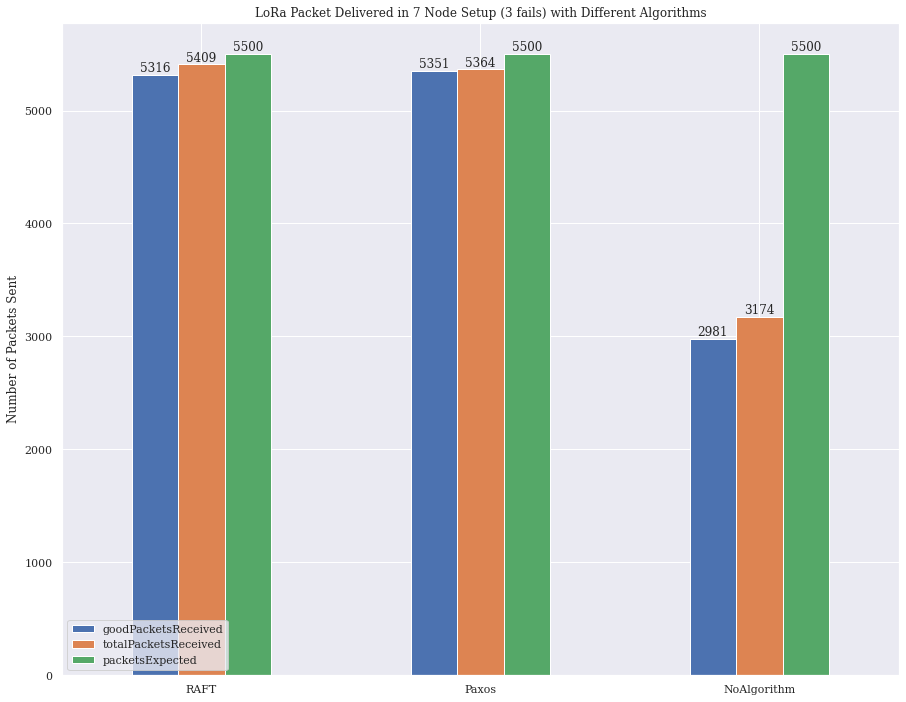

In [80]:
ax = all_7_nodes.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 7 Node Setup (3 fails) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Sent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_3.png', bbox_inches='tight')

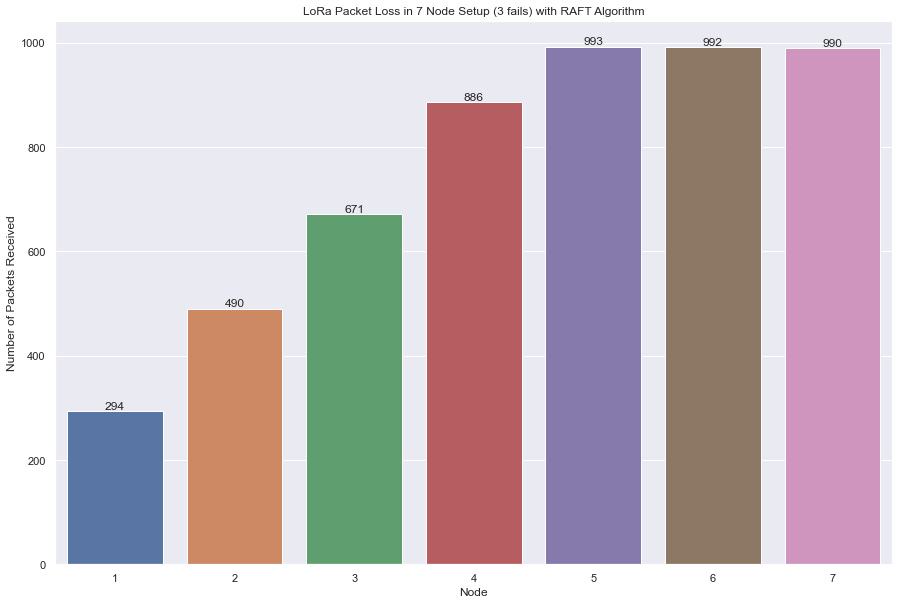

In [81]:
#LoRa Packet Loss in 7 Node Setup (3 fails) with RAFT Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_raft_7)
plt.title('LoRa Packet Loss in 7 Node Setup (3 fails) with RAFT Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_3_RAFT.png', bbox_inches='tight')

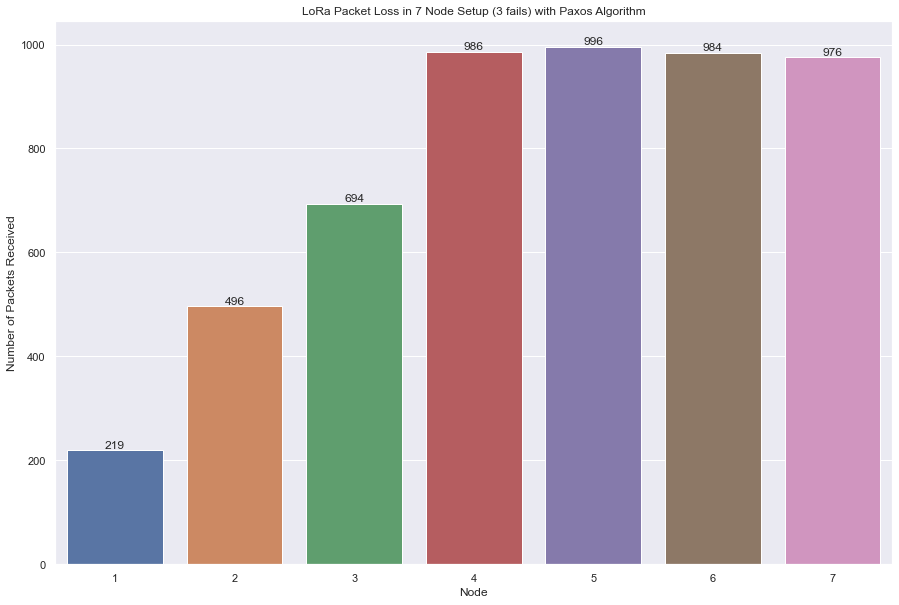

In [82]:
#LoRa Packet Loss in 7 Node Setup (3 fails) with Paxos Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_paxos_7)
plt.title('LoRa Packet Loss in 7 Node Setup (3 fails) with Paxos Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_3_Paxos.png', bbox_inches='tight')

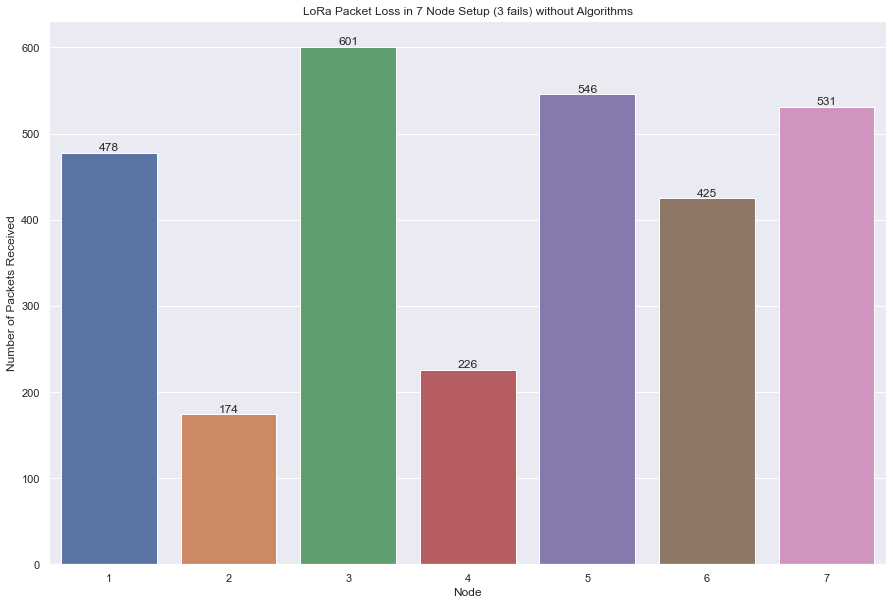

In [83]:
#LoRa Packet Loss in 7 Node Setup (3 fails) without Algorithms
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_noalg_7)
plt.title('LoRa Packet Loss in 7 Node Setup (3 fails) without Algorithms')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_3_noAlg_outdoor.png', bbox_inches='tight')

In [54]:
#no alg indoor

In [55]:
indoor_noalg_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control\\4_control_7-nodes_3-failures\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 869: expected 6 fields, saw 7\n'


In [56]:
indoor_noalg_data_7_nodes[indoor_noalg_data_7_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,20,5,52,18
4,6,3,21,8,56,19
...,...,...,...,...,...,...
1962,4,996,20,1,46,22
1963,4,997,21,1,45,22
1964,4,998,20,1,45,22
1965,4,999,20,1,45,22


In [57]:
indoor_noalg_data_7_nodes_clean = indoor_noalg_data_7_nodes.dropna()

In [58]:
indoor_noalg_data_7_nodes_clean.shape

(1852, 6)

In [59]:
indoor_noalg_data_7_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_7_nodes_3_clean.csv', index = False, header=True)

In [60]:
#manual cleaning of the csv req

In [61]:
clean_indoor_noalg_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_7_nodes_3_clean.csv", sep=",")

In [68]:
clean_indoor_noalg_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_7_nodes_3_clean.csv", sep=",")

In [69]:
clean_indoor_noalg_data_7 = clean_indoor_noalg_data_7_nodes.dropna()

In [70]:
clean_indoor_noalg_data_7.shape

(1770, 6)

In [71]:
final_indoor_clean_noalg_7 = clean_indoor_noalg_data_7.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [75]:
df1 = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithmOutdoor', 'NoAlgorithmIndoor'], 
               'goodPacketsReceived': [len(final_clean_raft_7), len(final_clean_paxos_7), len(final_clean_noalg_7),len(final_indoor_clean_noalg_7)], 
               'totalPacketsReceived': [len(raft_data_7_nodes), len(paxos_data_7_nodes), len(noalg_data_7_nodes),len(indoor_noalg_data_7_nodes)], 
               'packetsExpected': [5500, 5500, 5500,5500]}

all_7_nodes_outdoor = pd.DataFrame(df1)

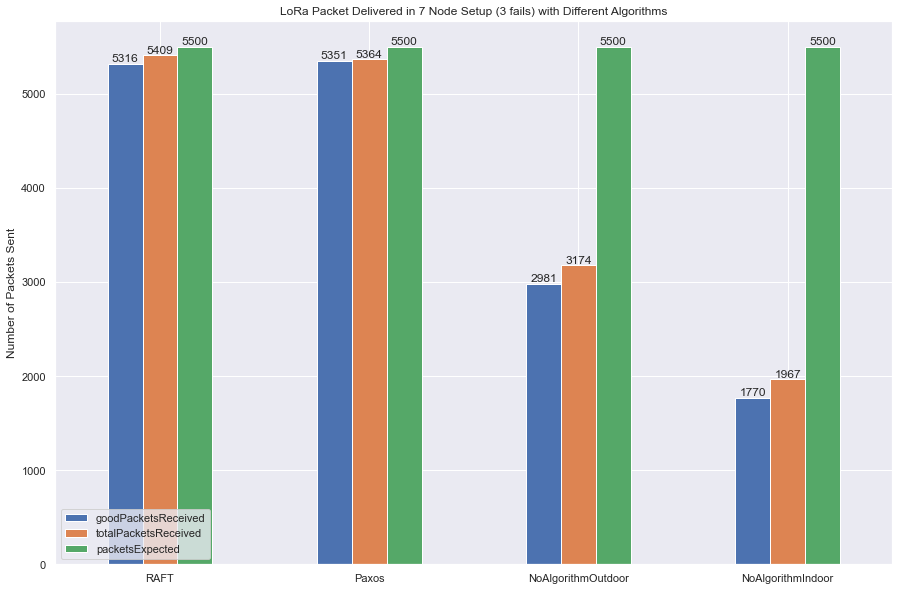

In [84]:
ax = all_7_nodes_outdoor.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 7 Node Setup (3 fails) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Sent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_3_indoor.png', bbox_inches='tight')

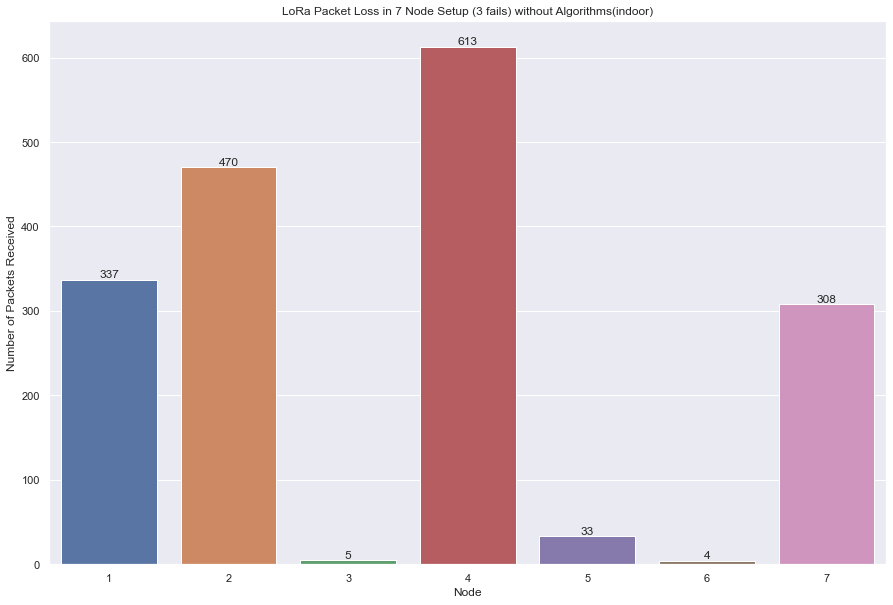

In [85]:
#LoRa Packet Loss in 7 Node Setup (3 fails) without Algorithms INDOOR
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_indoor_clean_noalg_7)
plt.title('LoRa Packet Loss in 7 Node Setup (3 fails) without Algorithms(indoor)')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_3_noAlg_indoor.png', bbox_inches='tight')